In [1]:
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread

In [2]:
model_name = 'dome103_3d'
basedir = 'n2v_models'
model = N2V(config=None, name=model_name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


In [3]:
# We load the data we want to process.
img = imread('domes/Dome103_processed.tif')

# Here we process the data.
# The 'n_tiles' parameter can be used if images are too big for the GPU memory.
# If we do not provide the 'n_tiles' parameter the system will automatically try to find an appropriate tiling.
pred = model.predict(img, axes='ZYX', n_tiles=(2,4,4))

The input image is of type uint16 and will be casted to float32 for prediction.
1/1 [==============================] - 18s 18s/step


  3%|▎         | 1/32 [00:00<?, ?it/s]

1/1 [==============================] - 17s 17s/step


  6%|▋         | 2/32 [00:17<04:23,  8.80s/it]

1/1 [==============================] - 17s 17s/step


  9%|▉         | 3/32 [00:35<05:59, 12.41s/it]

1/1 [==============================] - 18s 18s/step


 12%|█▎        | 4/32 [00:52<06:45, 14.46s/it]

1/1 [==============================] - 18s 18s/step


 16%|█▌        | 5/32 [01:10<07:03, 15.69s/it]

1/1 [==============================] - 18s 18s/step


 19%|█▉        | 6/32 [01:28<07:06, 16.42s/it]

1/1 [==============================] - 17s 17s/step


 22%|██▏       | 7/32 [01:46<06:58, 16.72s/it]

1/1 [==============================] - 17s 17s/step


 25%|██▌       | 8/32 [02:03<06:47, 16.97s/it]

1/1 [==============================] - 18s 18s/step


 28%|██▊       | 9/32 [02:21<06:38, 17.32s/it]

1/1 [==============================] - 18s 18s/step


 31%|███▏      | 10/32 [02:39<06:24, 17.49s/it]

1/1 [==============================] - 17s 17s/step


 34%|███▍      | 11/32 [02:57<06:07, 17.49s/it]

1/1 [==============================] - 17s 17s/step


 38%|███▊      | 12/32 [03:14<05:49, 17.47s/it]

1/1 [==============================] - 17s 17s/step


 41%|████      | 13/32 [03:32<05:32, 17.48s/it]

1/1 [==============================] - 18s 18s/step


 44%|████▍     | 14/32 [03:49<05:16, 17.57s/it]

1/1 [==============================] - 17s 17s/step


 47%|████▋     | 15/32 [04:07<04:57, 17.51s/it]

1/1 [==============================] - 17s 17s/step


 50%|█████     | 16/32 [04:24<04:40, 17.52s/it]

1/1 [==============================] - 18s 18s/step


 53%|█████▎    | 17/32 [04:42<04:25, 17.71s/it]

1/1 [==============================] - 18s 18s/step


 56%|█████▋    | 18/32 [05:00<04:09, 17.79s/it]

1/1 [==============================] - 17s 17s/step


 59%|█████▉    | 19/32 [05:18<03:50, 17.71s/it]

1/1 [==============================] - 17s 17s/step


 62%|██████▎   | 20/32 [05:35<03:31, 17.63s/it]

1/1 [==============================] - 17s 17s/step


 66%|██████▌   | 21/32 [05:53<03:13, 17.61s/it]

1/1 [==============================] - 18s 18s/step


 69%|██████▉   | 22/32 [06:11<02:56, 17.66s/it]

1/1 [==============================] - 17s 17s/step


 72%|███████▏  | 23/32 [06:28<02:38, 17.57s/it]

1/1 [==============================] - 18s 18s/step


 75%|███████▌  | 24/32 [06:46<02:21, 17.63s/it]

1/1 [==============================] - 18s 18s/step


 78%|███████▊  | 25/32 [07:04<02:04, 17.72s/it]

1/1 [==============================] - 18s 18s/step


 81%|████████▏ | 26/32 [07:22<01:46, 17.76s/it]

1/1 [==============================] - 17s 17s/step


 84%|████████▍ | 27/32 [07:39<01:28, 17.67s/it]

1/1 [==============================] - 18s 18s/step


 88%|████████▊ | 28/32 [07:57<01:10, 17.74s/it]

1/1 [==============================] - 18s 18s/step


 91%|█████████ | 29/32 [08:15<00:53, 17.81s/it]

1/1 [==============================] - 17s 17s/step


 94%|█████████▍| 30/32 [08:33<00:35, 17.73s/it]

1/1 [==============================] - 18s 18s/step


 97%|█████████▋| 31/32 [08:50<00:17, 17.75s/it]

1/1 [==============================] - 18s 18s/step


100%|██████████| 32/32 [09:09<00:00, 17.17s/it]


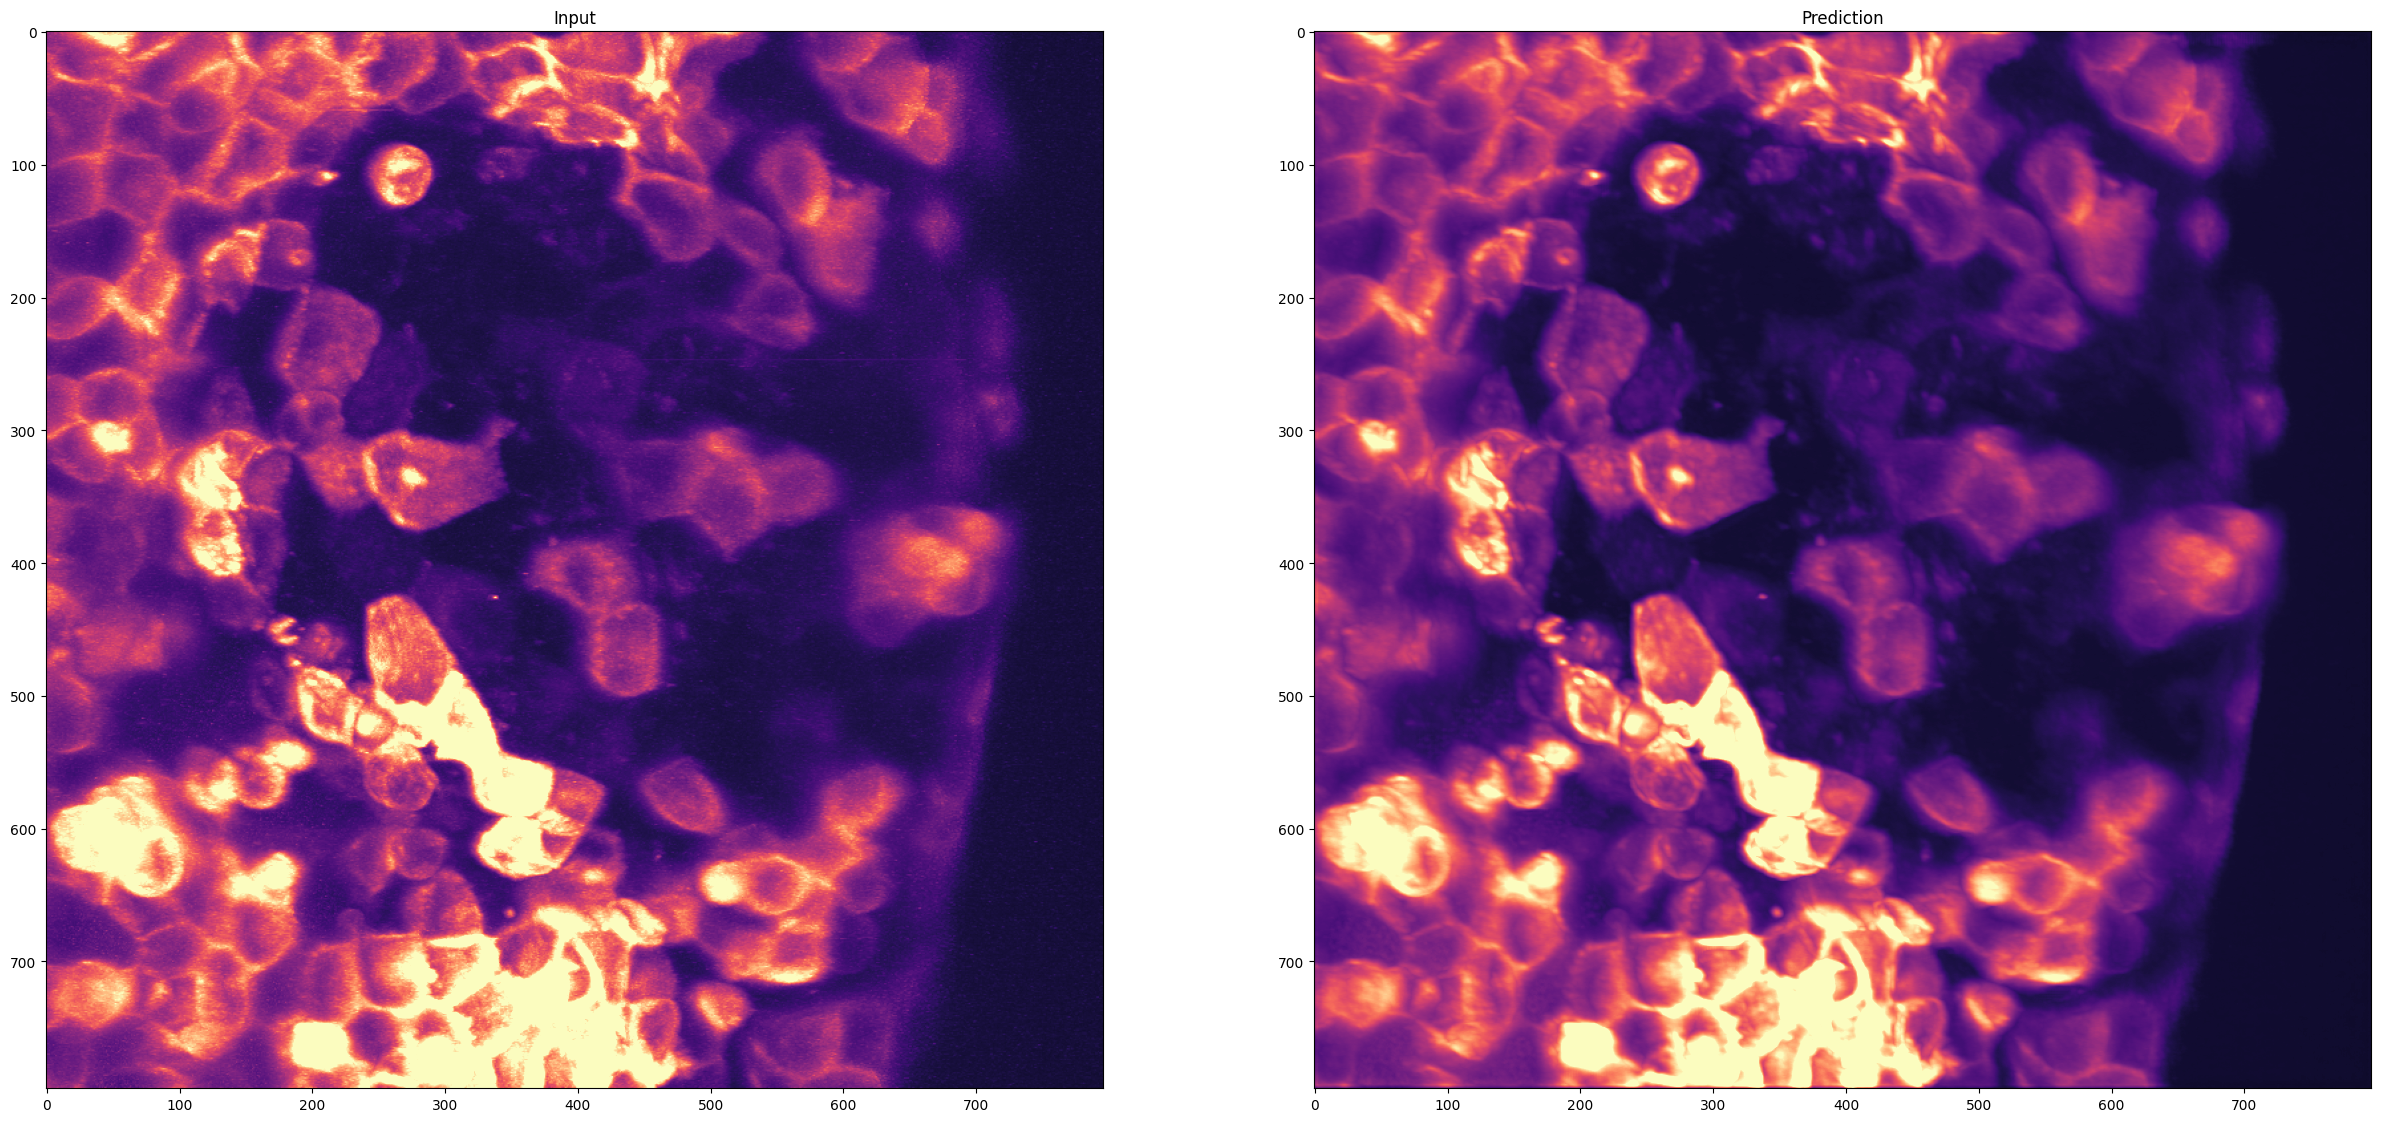

In [4]:
# Let's look at the results.
plt.figure(figsize=(30,30))

# We show the noisy input...
plt.subplot(1,2,1)
plt.imshow(np.max(img,axis=0),
           cmap='magma',
           vmin=np.percentile(img,0.1),
           vmax=np.percentile(img,99.9)
          )
plt.title('Input');

# and the result.
plt.subplot(1,2,2)
plt.imshow(np.max(pred,axis=0), 
           cmap='magma',
           vmin=np.percentile(pred,0.1),
           vmax=np.percentile(pred,99.9)
          )
plt.title('Prediction');